Column Names: Index(['Product_ID', 'Product_Name', 'Region', 'Marketing_Spend', 'Sales',
       'Effectiveness', 'Side_Effects', 'Age_Group', 'Trial_Period'],
      dtype='object')
   Product_ID Product_Name         Region  Marketing_Spend   Sales  \
0         101   PainRelief  North America            50000  100000   
1         102     ColdCure         Europe            30000   60000   
2         103  HeadacheFix           Asia            45000   80000   
3         104   PainRelief  North America            52000  110000   
4         105     ColdCure         Europe            28000   55000   

   Effectiveness  Side_Effects Age_Group Trial_Period  
0             85             5     20-30     6 months  
1             75             2     30-40     3 months  
2             80             3     40-50     6 months  
3             88             4     50-60    12 months  
4             70             1     30-40     3 months  
Missing Values:
 Product_ID         0
Product_Name       0
Reg

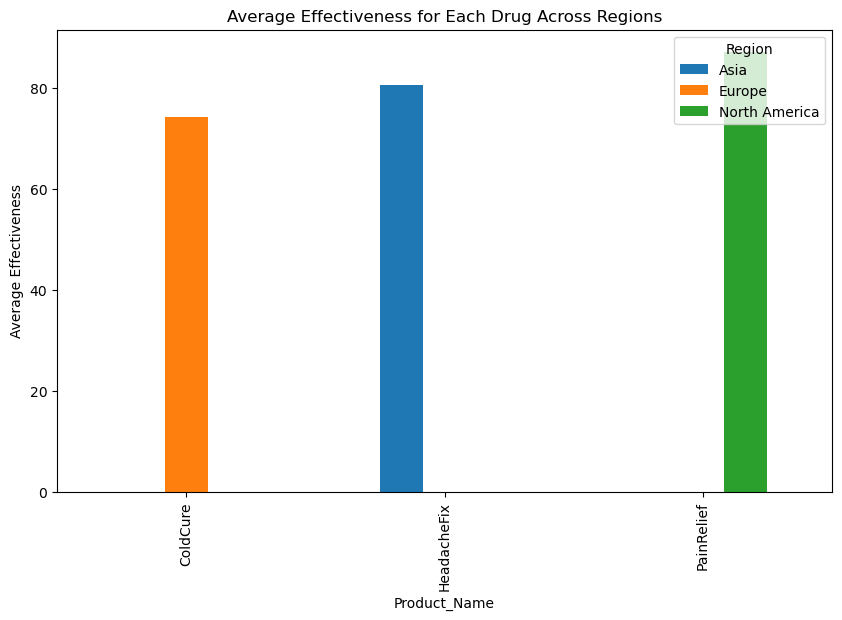

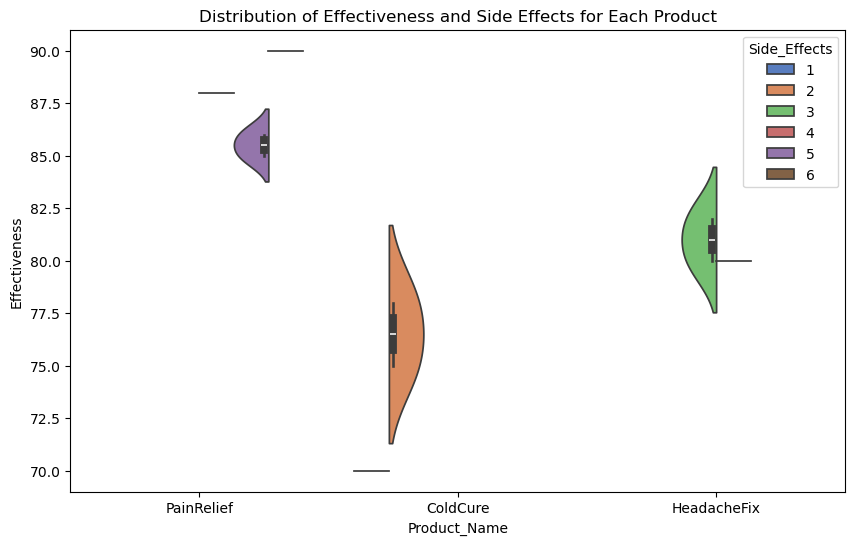

KeyError: 'Product'

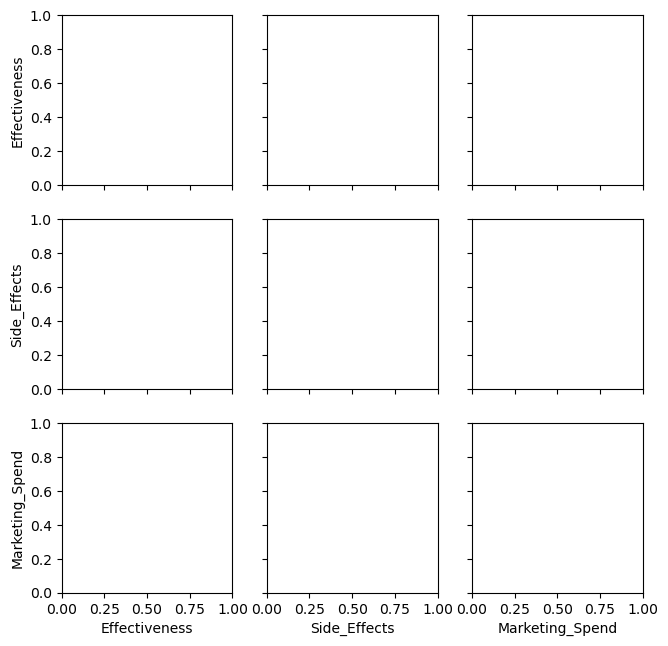

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Day_14_Pharma_data.csv')

df.columns = df.columns.str.strip()

print("Column Names:", df.columns)

print(df.head())

df.drop_duplicates(inplace=True)


print("Missing Values:\n", df.isnull().sum())

if 'Product_Name' in df.columns and 'Region' in df.columns:
    product_region_effectiveness = df.groupby(['Product_Name', 'Region'])['Effectiveness'].mean().unstack()
    product_region_effectiveness.plot(kind='bar', figsize=(10, 6), title='Average Effectiveness for Each Drug Across Regions')
    plt.xlabel('Product_Name')
    plt.ylabel('Average Effectiveness')
    plt.show()
else:
    print("Error: 'Product_Name' or 'Region' column not found!")

if 'Product_Name' in df.columns and 'Effectiveness' in df.columns and 'Side_Effects' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=df, x='Product_Name', y='Effectiveness', hue='Side_Effects', split=True, palette='muted')
    plt.title('Distribution of Effectiveness and Side Effects for Each Product')
    plt.xlabel('Product_Name')
    plt.ylabel('Effectiveness')
    plt.show()
else:
    print("Error: Missing necessary columns for violin plot!")

if 'Effectiveness' in df.columns and 'Side_Effects' in df.columns and 'Marketing_Spend' in df.columns:
    sns.pairplot(df[['Effectiveness', 'Side_Effects', 'Marketing_Spend']], hue='Product', palette='Set1')
    plt.suptitle('Pairplot: Effectiveness, Side Effects, and Marketing Spend', y=1.02)
    plt.show()
else:
    print("Error: Missing necessary columns for pairplot!")

if 'Trial_Period' in df.columns and 'Effectiveness' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Trial_Period', y='Effectiveness', palette='Set3')
    plt.title('Effectiveness Comparison for Different Trial Periods')
    plt.xlabel('Trial Period')
    plt.ylabel('Effectiveness')
    plt.show()
else:
    print("Error: Missing necessary columns for boxplot!")

if 'Marketing_Spend' in df.columns and 'Effectiveness' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.regplot(data=df, x='Marketing_Spend', y='Effectiveness', scatter_kws={'color':'blue'}, line_kws={'color':'red'})
    plt.title('Regression Plot: Marketing Spend vs Effectiveness')
    plt.xlabel('Marketing Spend')
    plt.ylabel('Effectiveness')
    plt.show()
else:
    print("Error: Missing necessary columns for regression plot!")
